In [15]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
tips = sns.load_dataset('tips')
from sklearn.model_selection import train_test_split

In [17]:
X = tips.drop('tip', axis = 1)
y = tips['tip']

In [18]:
print(X)

     total_bill     sex smoker   day    time  size
0         16.99  Female     No   Sun  Dinner     2
1         10.34    Male     No   Sun  Dinner     3
2         21.01    Male     No   Sun  Dinner     3
3         23.68    Male     No   Sun  Dinner     2
4         24.59  Female     No   Sun  Dinner     4
5         25.29    Male     No   Sun  Dinner     4
6          8.77    Male     No   Sun  Dinner     2
7         26.88    Male     No   Sun  Dinner     4
8         15.04    Male     No   Sun  Dinner     2
9         14.78    Male     No   Sun  Dinner     2
10        10.27    Male     No   Sun  Dinner     2
11        35.26  Female     No   Sun  Dinner     4
12        15.42    Male     No   Sun  Dinner     2
13        18.43    Male     No   Sun  Dinner     4
14        14.83  Female     No   Sun  Dinner     2
15        21.58    Male     No   Sun  Dinner     2
16        10.33  Female     No   Sun  Dinner     3
17        16.29    Male     No   Sun  Dinner     3
18        16.97  Female     No 

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lb = LabelEncoder()

LabelEncoder()


In [11]:
X['sex'] = lb.fit_transform(X['sex'])
X['smoker'] = lb.fit_transform(X['smoker'])
X['day'] = lb.fit_transform(X['day'])
X['time'] = lb.fit_transform(X['time'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


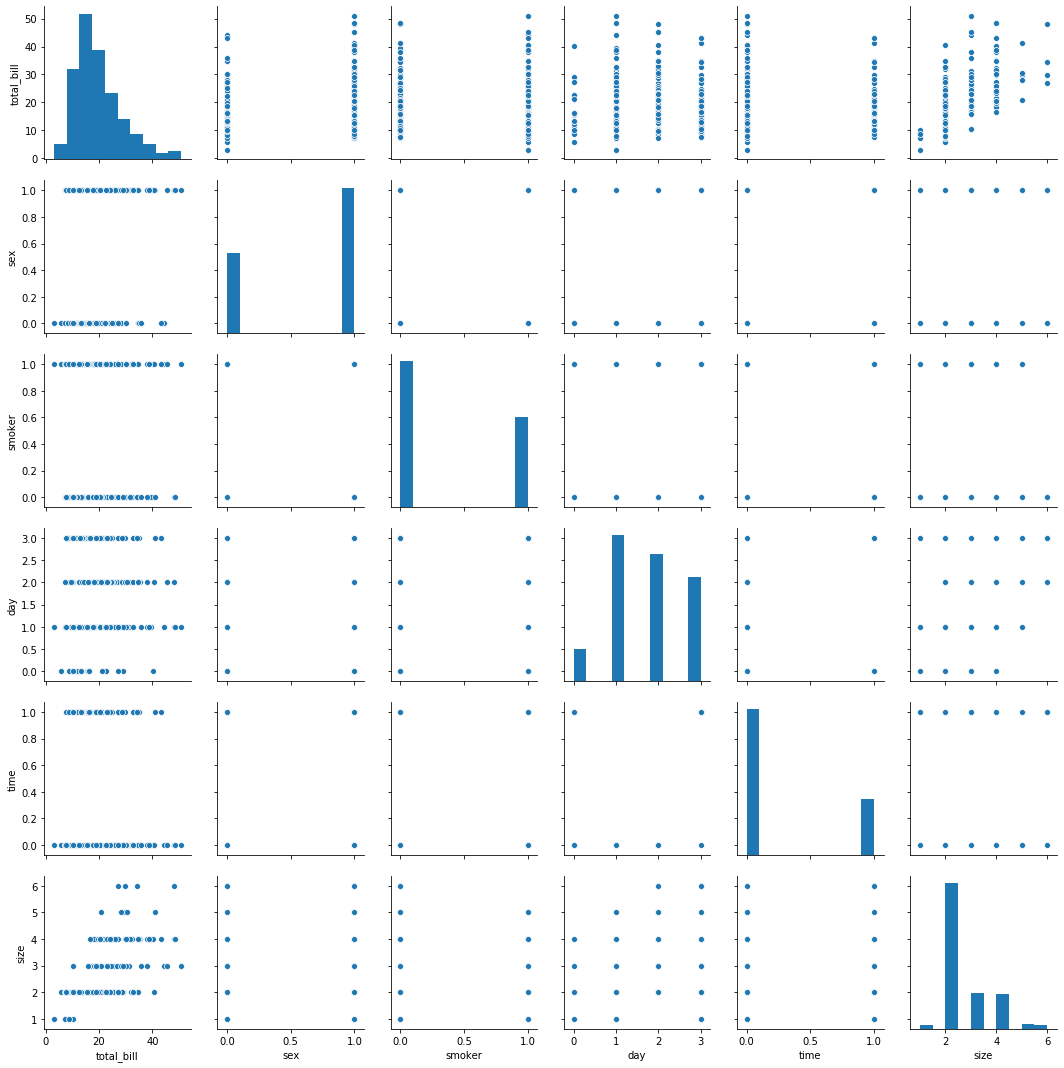

In [12]:
sns.pairplot(X)

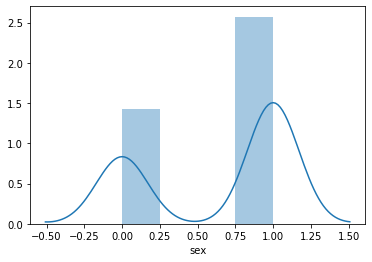

In [13]:
sns.distplot((X['sex']))

            total_bill       sex    smoker       day      time      size
total_bill    1.000000  0.144877  0.085721 -0.043550 -0.183118  0.598315
sex           0.144877  1.000000  0.002816 -0.078292 -0.205231  0.086195
smoker        0.085721  0.002816  1.000000 -0.282721 -0.054921 -0.133178
day          -0.043550 -0.078292 -0.282721  1.000000  0.638019  0.069510
time         -0.183118 -0.205231 -0.054921  0.638019  1.000000 -0.103411
size          0.598315  0.086195 -0.133178  0.069510 -0.103411  1.000000


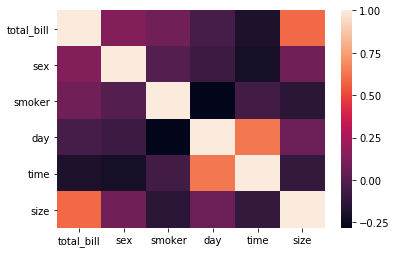

In [14]:
print(X.corr())
sns.heatmap(X.corr())

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [31]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [33]:
predictions = rf.predict(X_test)
print(predictions)

[2.44174 8.12347 2.99332 2.83683 4.29974 2.10558 2.51083 3.40106 2.12938
 2.6527  2.36371 3.16824 3.01322 5.27092 2.7196  3.49693 2.25999 2.02911
 2.89894 2.51534 3.14171 5.05449 4.01532 2.91396 5.19337 3.69937 2.52961
 2.39398 1.49071 1.78061 2.88442 2.30586 3.23952 3.84761 2.50529 2.7236
 8.12347 2.62708 2.27797 2.72259 2.42258 1.79645 3.5279  3.95533 1.88822
 2.9166  2.89229 3.16077 1.78117 2.80569 2.40397 2.45866 2.95143 1.97237
 3.90333 1.89056 4.72742 1.75271 2.58004 2.5811  5.20917 8.45483 1.99657
 4.02127 5.17564 3.38174 2.66756 2.58374 1.97315 1.73768 2.68579 2.87964
 1.86603 2.25043]


In [52]:
from sklearn.metrics import accuracy_score

# accuracy_score(predictions, y_test)
print(y_test.shape)

(74,)


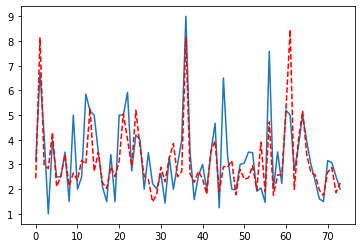

In [50]:
plt.plot(np.asarray(y_test))
plt.plot(predictions, "r--")
plt.show()

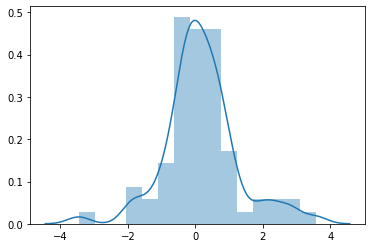

In [53]:
sns.distplot((np.asarray(y_test)-predictions))